# Data Analysis
## Setup
Importing Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

Importing data from csv

In [13]:
data = pd.read_csv("tsa-data/age_std_suicide_rates.csv")
data2 = data.drop(labels=["RegionCode", "RegionName", "CauseSpecificDeathPercentage", "GNI", "GNIPerCapita", "StdDeathRate"], axis=1)
data.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,33,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Female,14,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993,Male,46,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993,Female,27,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994,Male,37,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


## Calculating total rates per 100k 
(not separating by gender)

In [14]:
countries = data2["CountryCode"].unique()
combined = {"CountryCode": [], "CountryName": [], "Year": [], "DeathRatePer100K": [], "Population": [], "GDP": [], "GDPPerCapita": [], "InflationRate": [], "EmploymentPopulationRatio": []}

for cc in countries:
    c_data = data2.loc[data['CountryCode'] == cc]
    for year in c_data["Year"].unique():
        c_y_data = c_data.loc[c_data["Year"] == year]
        combined_rate = (c_y_data["SuicideCount"].sum() / c_y_data.iloc[0, 6]) * 100000
        combined["CountryCode"].append(cc) # country code
        combined["CountryName"].append(c_data.iloc[0, 1])  # country name
        combined["Year"].append(year)  # year
        combined["DeathRatePer100K"].append(combined_rate)  # combined death rate
        combined["Population"].append(c_y_data.iloc[0, 6])  # population
        combined["GDP"].append(c_y_data.iloc[0, 7])  # gdp
        combined["GDPPerCapita"].append(c_y_data.iloc[0, 8])  # gdp per capita
        combined["InflationRate"].append(c_y_data.iloc[0, 9])  # inflation
        combined["EmploymentPopulationRatio"].append(c_y_data.iloc[0, 10]) # employment rate


df_combined = pd.DataFrame(combined)
df_combined.head()
df_combined.dropna(inplace=True)
df_combined.to_csv("tsa-data/suicide_rates_combined.csv")

In [15]:
df_combined.head()

,CountryCode,CountryName,Year,DeathRatePer100K,Population,GDP,GDPPerCapita,InflationRate,EmploymentPopulationRatio
0,ALB,Albania,1992,1.447473,3247039.0,6.521750e+08,200.852220,226.005421,45.315
1,ALB,Albania,1993,2.261962,3227287.0,1.185315e+09,367.279225,85.004751,47.798
2,ALB,Albania,1994,1.621182,3207536.0,1.880951e+09,586.416135,22.565053,50.086
3,ALB,Albania,1995,2.854648,3187784.0,2.392765e+09,750.604449,7.793219,53.186
4,ALB,Albania,1996,2.904010,3168033.0,3.199641e+09,1009.977111,12.725478,53.039


## Graphs

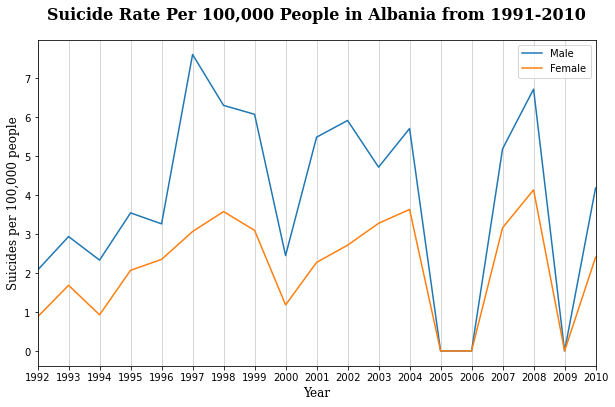

In [6]:
axisFont = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 12,
}

titleFont = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 16,
}

plt.figure(figsize=(10, 6))
alb_data = data.loc[data["CountryCode"]=="ALB"]
years = alb_data["Year"].unique()
x_male = alb_data.loc[alb_data["Sex"] == "Male"]["DeathRatePer100K"].to_numpy()
x_female = alb_data.loc[alb_data["Sex"] == "Female"]["DeathRatePer100K"].to_numpy()

plt.xticks(years)
plt.grid(axis="x", lw=.5)
plt.xlim(1992, 2010)
plt.plot(years, x_male, label="Male")
plt.plot(years, x_female, label="Female")

plt.title("Suicide Rate Per 100,000 People in Albania from 1991-2010", fontdict=titleFont, pad=20)
plt.xlabel("Year", fontdict=axisFont)
plt.ylabel("Suicides per 100,000 people", fontdict=axisFont)

plt.legend(loc=0)

plt.savefig("graphs/alb_per100k.png")

Generate Graphs of Suicides Per 100K People For Each Country

In [ ]:
country_codes = data["CountryCode"].unique()

for cc in country_codes[1:]:
    fig, ax = plt.subplots(figsize=(10, 6))
    c_data = data.loc[data["CountryCode"] == cc].sort_values("Year")
    years = c_data["Year"].unique()
    x_male = c_data.loc[c_data["Sex"] == "Male"]["DeathRatePer100K"].to_numpy()
    x_female = c_data.loc[c_data["Sex"] == "Female"]["DeathRatePer100K"].to_numpy()
    
    plt.xlim(min(years), (max(years)))
    if (max(years) - min(years)) >= 20:
        plt.xticks(range(min(years), max(years)+1, 2))
        plt.minorticks_on()
        plt.tick_params(which='minor', bottom=False, left=False)
        ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    else:
        plt.xticks(range(min(years), max(years)+1))

    plt.grid(axis="x", lw=.5, which="both")
    
    plt.plot(years, x_male, label="Male")
    plt.plot(years, x_female, label="Female")
    

    plt.title(f"Suicide Rate Per 100,000 People in {c_data.iloc[0, 1]} from {min(years)}-{max(years)}", fontdict=titleFont, pad=20)
    plt.xlabel("Year", fontdict=axisFont)
    plt.ylabel("Suicides per 100,000 people", fontdict=axisFont)

    plt.legend(loc=0)
    
    plt.savefig(f"graphs/{cc.lower()}_per100k.png")
    # plt.show()
    plt.close(fig)

Generate Graphs for all Countries GDP Per Capita Trends

In [8]:
country_codes = data["CountryCode"].unique()

for cc in country_codes:
    fig, ax = plt.subplots(figsize=(10, 6))
    c_data = data.loc[data["CountryCode"] == cc].sort_values("Year")
    years = c_data["Year"].unique()
    x_male = c_data.loc[c_data["Sex"] == "Male"]["GDPPerCapita"].to_numpy()
    x_female = c_data.loc[c_data["Sex"] == "Female"]["GDPPerCapita"].to_numpy()
    
    plt.xlim(min(years), (max(years)))
    if (max(years) - min(years)) >= 20:
        plt.xticks(range(min(years), max(years)+1, 2))
        plt.minorticks_on()
        plt.tick_params(which='minor', bottom=False, left=False)
    else:
        plt.xticks(range(min(years), max(years)+1))

    plt.grid(axis="x", lw=.5, which="both")
    
    plt.plot(years, x_male, label="Male")
    #plt.plot(years, x_female, label="Female")
    

    plt.title(f"GDP Per Capita in {c_data.iloc[0, 1]} from {min(years)}-{max(years)}", fontdict=titleFont, pad=20)
    plt.xlabel("Year", fontdict=axisFont)
    plt.ylabel("GDP Per Capita", fontdict=axisFont)

    #plt.legend(loc=0)
    
    plt.savefig(f"graphs/{cc.lower()}_GDPperCaptita.png")
    # plt.show()
    plt.close(fig)

/tmp/ipykernel_108927/2295441240.py:10: UserWarning: Attempting to set identical left == right == 2011 results in singular transformations; automatically expanding.
  plt.xlim(min(years), (max(years)))


Generate Graphs for all Countries Inflation Rate Trends

In [9]:
country_codes = data["CountryCode"].unique()

for cc in country_codes:
    fig, ax = plt.subplots(figsize=(10, 6))
    c_data = data.loc[data["CountryCode"] == cc].sort_values("Year")
    years = c_data["Year"].unique()
    x_male = c_data.loc[c_data["Sex"] == "Male"]["InflationRate"].to_numpy()
    x_female = c_data.loc[c_data["Sex"] == "Female"]["InflationRate"].to_numpy()
    
    plt.xlim(min(years), (max(years)))
    if (max(years) - min(years)) >= 20:
        plt.xticks(range(min(years), max(years)+1, 2))
        plt.minorticks_on()
        plt.tick_params(which='minor', bottom=False, left=False)
    else:
        plt.xticks(range(min(years), max(years)+1))

    plt.grid(axis="x", lw=.5, which="both")
    
    plt.plot(years, x_male, label="Male")
    #plt.plot(years, x_female, label="Female")
    

    plt.title(f"Inflation Rate in {c_data.iloc[0, 1]} from {min(years)}-{max(years)}", fontdict=titleFont, pad=20)
    plt.xlabel("Year", fontdict=axisFont)
    plt.ylabel("Inflation Rate", fontdict=axisFont)

    #plt.legend(loc=0)
    
    plt.savefig(f"graphs/{cc.lower()}_InflationRate.png")
    # plt.show()
    plt.close(fig)

/tmp/ipykernel_108927/2531844501.py:10: UserWarning: Attempting to set identical left == right == 2011 results in singular transformations; automatically expanding.
  plt.xlim(min(years), (max(years)))


Generate Graphs for all Countries Employment Trends

In [10]:
country_codes = data["CountryCode"].unique()

for cc in country_codes:
    fig, ax = plt.subplots(figsize=(10, 6))
    c_data = data.loc[data["CountryCode"] == cc].sort_values("Year")
    years = c_data["Year"].unique()
    x_male = c_data.loc[c_data["Sex"] == "Male"]["EmploymentPopulationRatio"].to_numpy()
    x_female = c_data.loc[c_data["Sex"] == "Female"]["EmploymentPopulationRatio"].to_numpy()
    
    plt.xlim(min(years), (max(years)))
    if (max(years) - min(years)) >= 20:
        plt.xticks(range(min(years), max(years)+1, 2))
        plt.minorticks_on()
        plt.tick_params(which='minor', bottom=False, left=False)
    else:
        plt.xticks(range(min(years), max(years)+1))

    plt.grid(axis="x", lw=.5, which="both")
    
    plt.plot(years, x_male, label="Male")
    #plt.plot(years, x_female, label="Female")
    

    plt.title(f"Employment in {c_data.iloc[0, 1]} from {min(years)}-{max(years)}", fontdict=titleFont, pad=20)
    plt.xlabel("Year", fontdict=axisFont)
    plt.ylabel("Employment Population Ratio", fontdict=axisFont)

    #plt.legend(loc=0)
    
    plt.savefig(f"graphs/{cc.lower()}_Employment.png")
    # plt.show()
    plt.close(fig)

/tmp/ipykernel_108927/1114920931.py:10: UserWarning: Attempting to set identical left == right == 2011 results in singular transformations; automatically expanding.
  plt.xlim(min(years), (max(years)))


Suicide Rates Over Time By Region

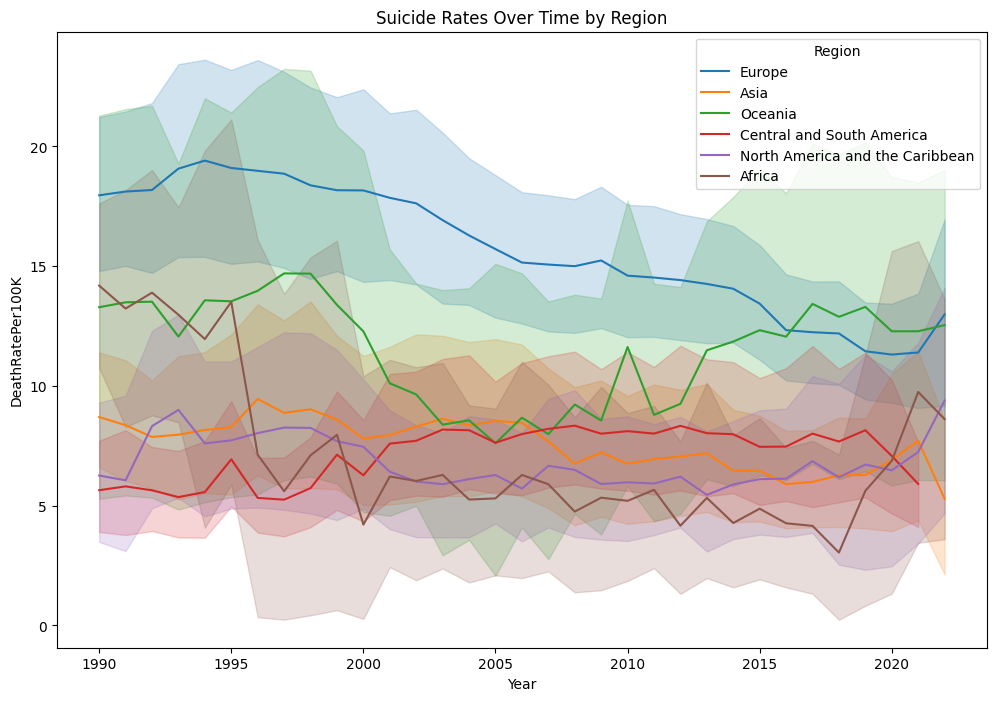

In [8]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='Year', y='DeathRatePer100K', hue="RegionName")
plt.title('Suicide Rates Over Time by Region')
plt.xlabel('Year')
plt.ylabel('DeathRatePer100K')
plt.legend(title='Region')
plt.show()

In [ ]:
cat_features  = ['RegionCode','RegionName','CountryCode', 'CountryName','Sex']

Correlation Table

In [ ]:
# Correlation analysis
print("\nCorrelation matrix:")
data["DeathRatePer100K"].corr(data["Year"])

In [ ]:
# Correlation analysis
print("\nCorrelation matrix:")
columns = ["Year", "Population", "GDPPerCapita", "InflationRate", "EmploymentPopulationRatio"]
for col in columns:
    print("\n Correlation between Death Rate and " + col + ": ")
    print(str(data["DeathRatePer100K"].corr(data[col])))

Making a Correlation Heat Map

In [ ]:
# Numeric columns
numeric_columns = ['DeathRatePer100K', 'GDPPerCapita', 'InflationRate',
                  'EmploymentPopulationRatio']

# Correlation matrix
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5,
    fmt=".2f", 
    center=0, 
    square=True, 
)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Analyze correlation with suicides, excluding self-correlation
correlation_with_suicides = correlation_matrix['DeathRatePer100K'].sort_values(ascending=False)[1:]

# Barplot for correlation with suicide numbers
plt.figure(figsize=(8, 6))  # Adjust figure size
sns.barplot(
    x=correlation_with_suicides.values, 
    y=correlation_with_suicides.index, 
    palette='viridis'
)
plt.title('Correlation with Suicide Numbers (excluding self-correlation)', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Variables', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

## Regressions

GDP per capita and Suicides per 100K people

In [56]:
# i need to choose a different career path
gdp = df_combined["GDPPerCapita"].values
ir = df_combined["InflationRate"].values
employment = df_combined["EmploymentPopulationRatio"].values

death_rate = df_combined["DeathRatePer100K"].values

gdp_pc_reg = np.poly1d(np.polyfit(gdp, death_rate, 11))
ir_reg = np.poly1d(np.polyfit(ir, death_rate, 11))
employment_reg = np.poly1d(np.polyfit(employment, death_rate, 11))

print(r2_score(death_rate, gdp_pc_reg(gdp)))
print(r2_score(death_rate, ir_reg(ir)))
print(r2_score(death_rate, employment_reg(employment)))

0.015525130176612834
0.029890144842662503
0.10111030933114495


### Regression Graph

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


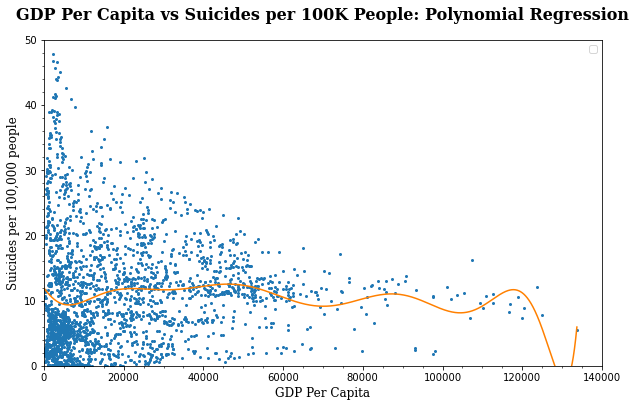

In [70]:
plt.figure(figsize=(10, 6))

plt.scatter(gdp, death_rate, s=4)
plt.plot(np.arange(min(gdp), max(gdp), 0.1), gdp_pc_reg(np.arange(min(gdp), max(gdp), 0.1)), c='#ff8000')

plt.xlim(0, 140000)
plt.xticks(np.arange(0, 150000, 20000))
plt.minorticks_on()

plt.ylim(0, 50)
plt.yticks(np.arange(0, 55, 10))

plt.title("GDP Per Capita vs Suicides per 100K People: Polynomial Regression", fontdict=titleFont, pad=20)
plt.xlabel("GDP Per Capita", fontdict=axisFont)
plt.ylabel("Suicides per 100,000 people", fontdict=axisFont)

plt.legend(loc=0)

plt.savefig("graphs/gdp_pc_reg.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


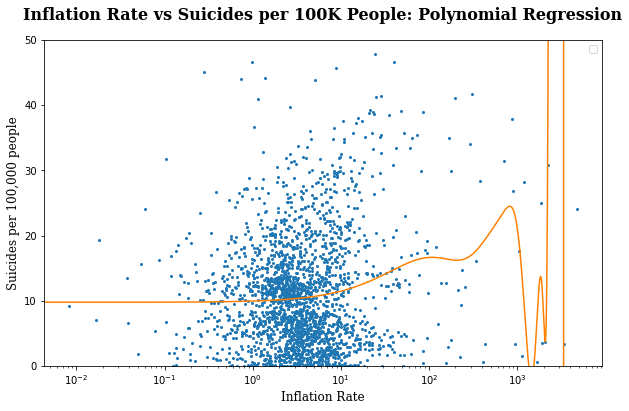

In [75]:
plt.figure(figsize=(10, 6))

plt.scatter(ir, death_rate, s=4)
plt.plot(np.arange(min(ir), max(ir), 0.1), ir_reg(np.arange(min(ir), max(ir), 0.1)), c='#ff8000')

plt.title("Inflation Rate vs Suicides per 100K People: Polynomial Regression", fontdict=titleFont, pad=20)
plt.xlabel("Inflation Rate", fontdict=axisFont)
plt.ylabel("Suicides per 100,000 people", fontdict=axisFont)
plt.xscale('log')

plt.ylim(0, 50)
plt.yticks(np.arange(0, 55, 10))
plt.legend(loc=0)

plt.savefig("graphs/ir_reg.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


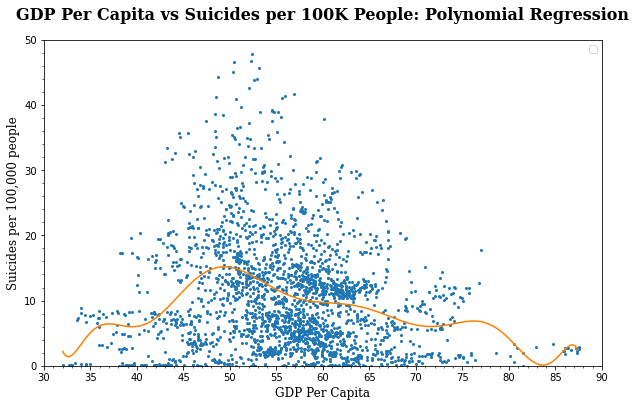

In [78]:
plt.figure(figsize=(10, 6))

plt.scatter(employment, death_rate, s=4)
plt.plot(np.arange(min(employment), max(employment), 0.1), employment_reg(np.arange(min(employment), max(employment), 0.1)), c='#ff8000')

plt.xlim(30, 90)
plt.xticks(np.arange(30, 95, 5))
plt.minorticks_on()

plt.ylim(0, 50)
plt.yticks(np.arange(0, 55, 10))

plt.title("GDP Per Capita vs Suicides per 100K People: Polynomial Regression", fontdict=titleFont, pad=20)
plt.xlabel("GDP Per Capita", fontdict=axisFont)
plt.ylabel("Suicides per 100,000 people", fontdict=axisFont)

plt.legend(loc=0)

plt.savefig("graphs/gdp_pc_reg.png")